## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Input, Dropout, BatchNormalization, Dense, Activation
from keras.models import Model
from keras.regularizers import l1_l2

In [9]:
# Hint 1 : 在 Dense 層中增加 Regularizers
# Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# Hint 3 : 增加 Batch-normalization 層
def build_mlp(x_train, l1_rate = 0.01, l2_rate= 0.01):
    """
    Build your own model
    """
    input_layer = Input(shape = (x_train.shape[1], ), name = 'Input_layer')
    
    x = Dense(512, kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dense(256, kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dense(128, kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dense(64, kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
        
    output = Dense(10)(x)
    
    model = Model(inputs = [input_layer], outputs = [output])
    
    return model

In [14]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
MOMENTUM = 0.95
Batch_size = 32

params = {'l1_rate': [0, 0.01, 0.005, 0.001],
          'l2_rate': [0, 0.01, 0.005, 0.001]}

In [16]:
from sklearn.model_selection import ParameterGrid
results = {}
"""
Write your training loop and record results
"""
for g in ParameterGrid(params):
    print('params: l1_rate: {}, l2_rate: {}'.format(*g.values()))
    keras.backend.clear_session()
    model = build_mlp(x_train, **g)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=Batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{}-{}".format(*g.values())
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

params: l1_rate: 0, l2_rate: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                196672    
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 197,578
Trainable params: 197,450
Non-trainable params: 128
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 171us/step - loss: 6.3822 - acc: 0.1003 - val_loss: 5.6688 - val_acc: 0.0938
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 5.2633 - acc: 0.0966 - val_loss: 5.1129 - val_acc: 0.0987
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 5.0743 - acc: 0.1029 - val_loss: 5.0785 - val_acc: 0.0958
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 5.1448 - acc: 0.0958 - val_loss: 5.3396 - val_acc: 0.0865
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 5.8122 - acc: 0.0793 - val_loss: 5.9823 - val_acc: 0.0612
Epoch 6/50
50000/50000 [==============================] - 9s 172us/step - loss: 4.7485 - acc: 0.0435 - val_loss: 3.9628 - val_acc: 0.0361
Epoch 7/50
50000/50000 [==============================] - 9s 170us/step - loss: 3.8573 - acc: 0.0341 - val_loss: 3.5979 - 

Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 7.4970 - acc: 0.1065 - val_loss: 8.4583 - val_acc: 0.1066
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 8.0739 - acc: 0.1093 - val_loss: 8.2448 - val_acc: 0.1098
Epoch 4/50
50000/50000 [==============================] - 8s 154us/step - loss: 8.3401 - acc: 0.1202 - val_loss: 8.6702 - val_acc: 0.1484
Epoch 5/50
50000/50000 [==============================] - 8s 158us/step - loss: 8.2589 - acc: 0.1441 - val_loss: 8.7400 - val_acc: 0.1460
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 8.3077 - acc: 0.1394 - val_loss: 8.2240 - val_acc: 0.1426
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 8.1940 - acc: 0.1382 - val_loss: 8.2746 - val_acc: 0.1412
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 8.4943 - acc: 0.1381 - val_loss: 8.4425 - val_acc: 0.1343
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 153us/step - loss: 31.7905 - acc: 0.1315 - val_loss: 30.0601 - val_acc: 0.1338
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 27.6411 - acc: 0.1358 - val_loss: 25.0917 - val_acc: 0.1309
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 23.3994 - acc: 0.1163 - val_loss: 21.8239 - val_acc: 0.1172
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 20.8414 - acc: 0.1121 - val_loss: 19.5744 - val_acc: 0.1277
Epoch 8/50
50000/50000 [==============================] - 8s 153us/step - loss: 18.9320 - acc: 0.1342 - val_loss: 19.0010 - val_acc: 0.1347
Epoch 9/50
50000/50000 [==============================] - 8s 157us/step - loss: 18.3444 - acc: 0.1374 - val_loss: 18.1188 - val_acc: 0.1159
Epoch 10/50
50000/50000 [==============================] - 8s 156us/step - loss: 16.2601 - acc: 0.1447 - val_loss: 15.3356 - val_acc: 0.1305
Epoch 11/50
50000/50000 [=====

Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 19.4091 - acc: 0.0914 - val_loss: 18.8669 - val_acc: 0.0863
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 17.7616 - acc: 0.0737 - val_loss: 18.6604 - val_acc: 0.0789
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 15.4963 - acc: 0.0598 - val_loss: 13.9999 - val_acc: 0.0656
Epoch 10/50
50000/50000 [==============================] - 8s 155us/step - loss: 13.9640 - acc: 0.0485 - val_loss: 13.8570 - val_acc: 0.0449
Epoch 11/50
50000/50000 [==============================] - 8s 155us/step - loss: 13.2455 - acc: 0.0491 - val_loss: 11.4513 - val_acc: 0.0536
Epoch 12/50
50000/50000 [==============================] - 8s 155us/step - loss: 13.7121 - acc: 0.0554 - val_loss: 13.1579 - val_acc: 0.0499
Epoch 13/50
50000/50000 [==============================] - 8s 157us/step - loss: 13.3630 - acc: 0.0498 - val_loss: 14.6604 - val_acc: 0.0586
Epoch 14/50
5000

50000/50000 [==============================] - 8s 153us/step - loss: 12.3364 - acc: 0.0723 - val_loss: 11.2545 - val_acc: 0.0730
Epoch 9/50
50000/50000 [==============================] - 8s 153us/step - loss: 10.5031 - acc: 0.0644 - val_loss: 9.9775 - val_acc: 0.0901
Epoch 10/50
50000/50000 [==============================] - 8s 155us/step - loss: 10.7024 - acc: 0.0588 - val_loss: 11.3254 - val_acc: 0.0486
Epoch 11/50
50000/50000 [==============================] - 8s 153us/step - loss: 10.6593 - acc: 0.0537 - val_loss: 10.6311 - val_acc: 0.0603
Epoch 12/50
50000/50000 [==============================] - 8s 154us/step - loss: 10.3948 - acc: 0.0526 - val_loss: 9.9407 - val_acc: 0.0439
Epoch 13/50
50000/50000 [==============================] - 8s 154us/step - loss: 9.8325 - acc: 0.0518 - val_loss: 9.5568 - val_acc: 0.0500
Epoch 14/50
50000/50000 [==============================] - 8s 154us/step - loss: 9.3072 - acc: 0.0566 - val_loss: 9.2462 - val_acc: 0.0503
Epoch 15/50
50000/50000 [=======

Epoch 9/50
50000/50000 [==============================] - 8s 164us/step - loss: 9.3047 - acc: 0.1009 - val_loss: 9.1937 - val_acc: 0.0897
Epoch 10/50
50000/50000 [==============================] - 8s 163us/step - loss: 8.3610 - acc: 0.1076 - val_loss: 8.7683 - val_acc: 0.0698
Epoch 11/50
50000/50000 [==============================] - 8s 167us/step - loss: 7.6696 - acc: 0.1122 - val_loss: 7.7038 - val_acc: 0.1425
Epoch 12/50
50000/50000 [==============================] - 8s 160us/step - loss: 8.1064 - acc: 0.1196 - val_loss: 8.3169 - val_acc: 0.0659
Epoch 13/50
50000/50000 [==============================] - 8s 159us/step - loss: 7.4122 - acc: 0.1039 - val_loss: 6.6506 - val_acc: 0.1213
Epoch 14/50
50000/50000 [==============================] - 8s 161us/step - loss: 7.5528 - acc: 0.0957 - val_loss: 7.5672 - val_acc: 0.1010
Epoch 15/50
50000/50000 [==============================] - 9s 170us/step - loss: 6.8969 - acc: 0.0929 - val_loss: 6.7454 - val_acc: 0.0938
Epoch 16/50
50000/50000 [===

50000/50000 [==============================] - 7s 148us/step - loss: 14.1471 - acc: 0.0466 - val_loss: 13.5195 - val_acc: 0.0476
Epoch 11/50
50000/50000 [==============================] - 7s 146us/step - loss: 13.2813 - acc: 0.0441 - val_loss: 12.8354 - val_acc: 0.0417
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 12.5629 - acc: 0.0389 - val_loss: 12.1593 - val_acc: 0.0299
Epoch 13/50
50000/50000 [==============================] - 7s 147us/step - loss: 11.7087 - acc: 0.0376 - val_loss: 11.5316 - val_acc: 0.0464
Epoch 14/50
50000/50000 [==============================] - 7s 148us/step - loss: 11.7315 - acc: 0.0498 - val_loss: 11.2395 - val_acc: 0.0519
Epoch 15/50
50000/50000 [==============================] - 7s 147us/step - loss: 11.7299 - acc: 0.0483 - val_loss: 12.7082 - val_acc: 0.0399
Epoch 16/50
50000/50000 [==============================] - 7s 147us/step - loss: 12.1704 - acc: 0.0439 - val_loss: 11.9927 - val_acc: 0.0423
Epoch 17/50
50000/50000 [

Epoch 11/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.3222 - acc: 0.1315 - val_loss: 6.3131 - val_acc: 0.1336
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 6.4443 - acc: 0.1258 - val_loss: 6.6646 - val_acc: 0.1602
Epoch 13/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.4890 - acc: 0.1274 - val_loss: 6.1246 - val_acc: 0.1244
Epoch 14/50
50000/50000 [==============================] - 7s 146us/step - loss: 6.0516 - acc: 0.1365 - val_loss: 5.9654 - val_acc: 0.1369
Epoch 15/50
50000/50000 [==============================] - 7s 147us/step - loss: 5.8746 - acc: 0.1313 - val_loss: 5.9672 - val_acc: 0.1291
Epoch 16/50
50000/50000 [==============================] - 7s 146us/step - loss: 5.7641 - acc: 0.1398 - val_loss: 5.7404 - val_acc: 0.1514
Epoch 17/50
50000/50000 [==============================] - 7s 148us/step - loss: 5.5586 - acc: 0.1368 - val_loss: 5.5544 - val_acc: 0.1408
Epoch 18/50
50000/50000 [==

50000/50000 [==============================] - 7s 146us/step - loss: 11.6730 - acc: 0.1211 - val_loss: 11.5259 - val_acc: 0.1161
Epoch 13/50
50000/50000 [==============================] - 7s 148us/step - loss: 11.6291 - acc: 0.1210 - val_loss: 12.0138 - val_acc: 0.1325
Epoch 14/50
50000/50000 [==============================] - 7s 146us/step - loss: 11.7194 - acc: 0.1225 - val_loss: 11.4418 - val_acc: 0.1414
Epoch 15/50
50000/50000 [==============================] - 7s 146us/step - loss: 11.6942 - acc: 0.1274 - val_loss: 11.8361 - val_acc: 0.1241
Epoch 16/50
50000/50000 [==============================] - 7s 147us/step - loss: 11.6156 - acc: 0.1380 - val_loss: 11.1528 - val_acc: 0.1394
Epoch 17/50
50000/50000 [==============================] - 8s 155us/step - loss: 11.0832 - acc: 0.1472 - val_loss: 10.6283 - val_acc: 0.1328
Epoch 18/50
50000/50000 [==============================] - 8s 153us/step - loss: 11.6771 - acc: 0.1524 - val_loss: 11.7078 - val_acc: 0.1735
Epoch 19/50
50000/50000 [

Epoch 14/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.5626 - acc: 0.0798 - val_loss: 7.3707 - val_acc: 0.0926
Epoch 15/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.4665 - acc: 0.0912 - val_loss: 6.4049 - val_acc: 0.0982
Epoch 16/50
50000/50000 [==============================] - 7s 150us/step - loss: 6.2853 - acc: 0.0998 - val_loss: 6.2342 - val_acc: 0.1029
Epoch 17/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.2114 - acc: 0.1094 - val_loss: 6.2149 - val_acc: 0.1167
Epoch 18/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.1811 - acc: 0.1094 - val_loss: 6.2251 - val_acc: 0.1125
Epoch 19/50
50000/50000 [==============================] - 7s 147us/step - loss: 6.2201 - acc: 0.1103 - val_loss: 6.1301 - val_acc: 0.1206
Epoch 20/50
50000/50000 [==============================] - 7s 149us/step - loss: 6.2009 - acc: 0.1078 - val_loss: 6.1485 - val_acc: 0.1070
Epoch 21/50
50000/50000 [==

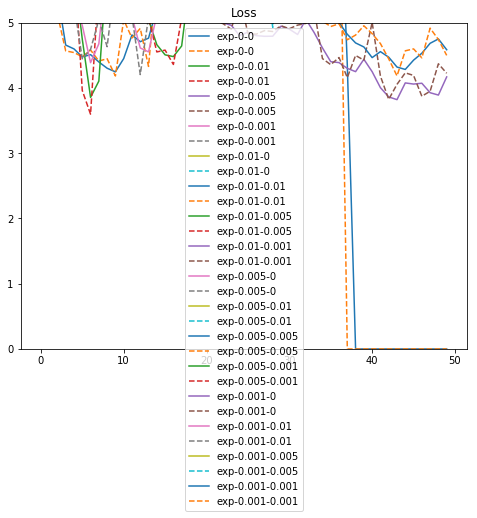

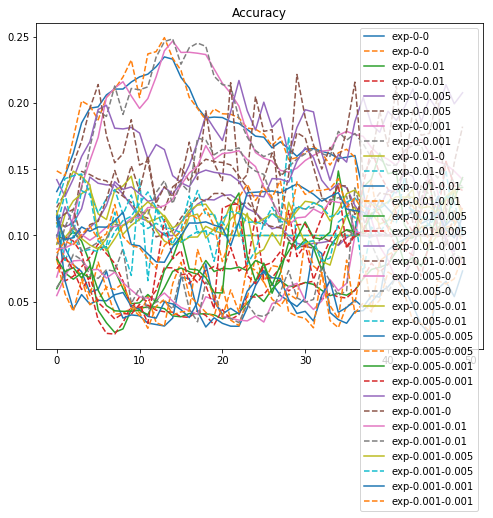

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
## color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()